In [6]:
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation,BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks



In [7]:
img_width, img_height = 500,200
batch_size = 64
lr = 0.0004

#### Data Preprocessing

Data reading respective to each class

In [8]:
train_data_path = 'data_preprocessing/train_data'
validation_data_path = 'data_preprocessing/validation_data'

"""
Parameters
"""

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 0 images belonging to 0 classes.
Found 50 images belonging to 16 classes.


In [14]:
train_generator.class_indices

{'KUKIDENT 0% 40 GR': 0,
 'KUKIDENT ANTIBATTERICO 47 GR': 1,
 'KUKIDENT DOPPIA AZIONE 40 GR': 2,
 'KUKIDENT DOPPIA AZIONE 60 GR': 3,
 'KUKIDENT DOPPIA PROTEZIONE 40 GR': 4,
 'KUKIDENT FRESCO 47 GR': 5,
 'KUKIDENT NEUTRO 47 GR': 6,
 'KUKIDENT NEUTRO 70 GR': 7,
 'KUKIDENT PLUS 47 GR': 8,
 'KUKIDENT PLUS 70 GR': 9,
 'KUKIDENT POLVERE': 10,
 'KUKIDENT SIGILLO 40 GR': 11,
 'KUKIDENT SIGILLO 57 GR': 12,
 'POLIDENT AZ.TOTALE CREMA ADESIV 70G': 13,
 'POLIDENT FREE CR ADESIVA 70G': 14,
 'POLIDENT PROT.GENG CREMA ADES. 70G': 15}

### Model

In [15]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (5, 5),strides=(2 ,2)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Convolution2D(32, (11, 11)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))


model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 498, 198, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 498, 198, 32)      128       
_________________________________________________________________
activation_5 (Activation)    (None, 498, 198, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 249, 99, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 123, 48, 32)       25632     
_________________________________________________________________
batch_normalization_6 (Batch (None, 123, 48, 32)       128       
_________________________________________________________________
activation_6 (Activation)    (None, 123, 48, 32)       0         
__________

### Training

In [20]:
epochs = 20
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=10)

Epoch 1/20
10/10 [==============================] - 29s 3s/step - loss: 1.0702 - acc: 0.7106 - val_loss: 0.7590 - val_acc: 0.8000
Epoch 2/20
10/10 [==============================] - 33s 3s/step - loss: 1.0225 - acc: 0.7531 - val_loss: 0.5343 - val_acc: 0.8400
Epoch 3/20
10/10 [==============================] - 33s 3s/step - loss: 0.8664 - acc: 0.8119 - val_loss: 0.5251 - val_acc: 0.9000
Epoch 4/20
10/10 [==============================] - 37s 4s/step - loss: 0.8291 - acc: 0.7984 - val_loss: 0.4128 - val_acc: 0.9400
Epoch 5/20
10/10 [==============================] - 31s 3s/step - loss: 0.8112 - acc: 0.8109 - val_loss: 0.3229 - val_acc: 0.9400
Epoch 6/20
10/10 [==============================] - 30s 3s/step - loss: 0.8131 - acc: 0.8222 - val_loss: 0.3203 - val_acc: 0.9400
Epoch 7/20
10/10 [==============================] - 34s 3s/step - loss: 0.7620 - acc: 0.8344 - val_loss: 0.3159 - val_acc: 0.9200
Epoch 8/20
10/10 [==============================] - 32s 3s/step - loss: 0.7456 - acc: 0.85

### Model Evaluation

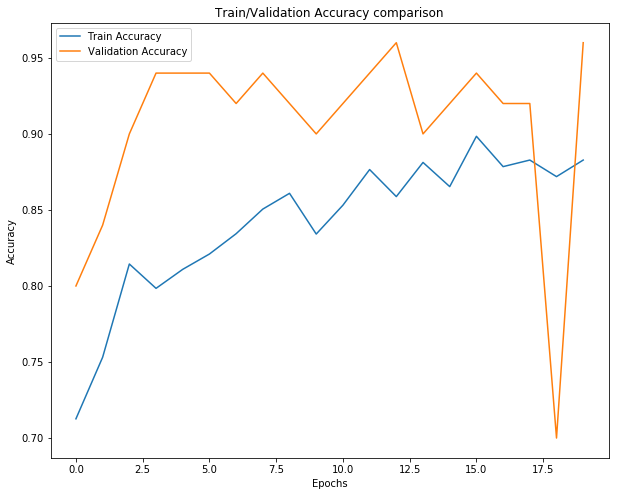

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
plt.plot(hist.history['acc'],label='Train Accuracy')
plt.plot(hist.history['val_acc'],label='Validation Accuracy')
plt.title('Train/Validation Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Train_Validation_Accuracy_comparison.png')
plt.show()

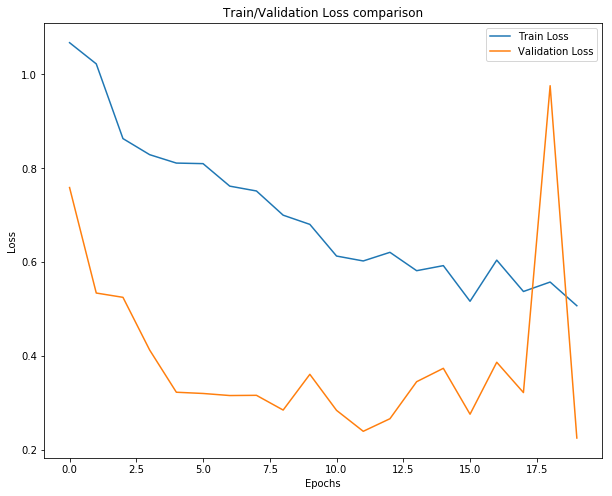

In [24]:
plt.figure(figsize=[10,8])
plt.plot(hist.history['loss'],label='Train Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.title('Train/Validation Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Train_Validation_Loss_comparison.png')
plt.show()

In [25]:
target_dir = 'models/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
model.save('models/model.h5')
model.save_weights('models/weights.h5')

### Testing on new Images

In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

Using TensorFlow backend.


In [2]:
img_width, img_height = 500,200
model_path = './models/model.h5'
model_weights_path = './models/weights.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

In [3]:
file='data_preprocessing/validation_data/KUKIDENT ANTIBATTERICO 47 GR/700.png'
img = load_img(file, target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
array = model.predict(x)
result = array[0]
answer = np.argmax(result)

In [ ]:
print ('predicted_output:',list(train_generator.class_indices.keys())[answer])
img

In [10]:
np.__version__

'1.16.2'